In [14]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_out_metazoa.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [15]:
data

['t_n55          7.3825 ( 7.1180,  7.7601) ( 7.0924,  7.7152)  0.6228 (Jnode 106)\n',
 't_n56          7.2299 ( 7.0612,  7.4140) ( 7.0532,  7.4038)  0.3506 (Jnode 105)\n',
 't_n57          6.9440 ( 6.8207,  7.0788) ( 6.8198,  7.0776)  0.2579 (Jnode 104)\n',
 't_n58          6.4281 ( 6.3524,  6.5092) ( 6.3506,  6.5067)  0.1561 (Jnode 103)\n',
 't_n59          6.3268 ( 6.2517,  6.4022) ( 6.2497,  6.3994)  0.1497 (Jnode 102)\n',
 't_n60          6.1826 ( 6.1057,  6.2576) ( 6.1056,  6.2571)  0.1516 (Jnode 101)\n',
 't_n61          5.9720 ( 5.8890,  6.0510) ( 5.8902,  6.0520)  0.1617 (Jnode 100)\n',
 't_n62          3.5142 ( 2.9620,  3.9809) ( 3.0317,  4.0220)  0.9903 (Jnode 99)\n',
 't_n63          5.1403 ( 5.0471,  5.2342) ( 5.0500,  5.2361)  0.1861 (Jnode 98)\n',
 't_n64          4.4669 ( 4.4147,  4.5274) ( 4.4112,  4.5227)  0.1115 (Jnode 97)\n',
 't_n65          4.2170 ( 4.2069,  4.2444) ( 4.2060,  4.2379)  0.0319 (Jnode 96)\n',
 't_n66          3.5753 ( 3.5264,  3.6276) ( 3.5245,  3.62

In [16]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [17]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [18]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [19]:
posterior_mean_iqtree

[7.3825,
 7.2299,
 6.944,
 6.4281,
 6.3268,
 6.1826,
 5.972,
 3.5142,
 5.1403,
 4.4669,
 4.217,
 3.5753,
 3.1835,
 1.996,
 0.8876,
 4.4044,
 6.2443,
 6.077,
 5.9866,
 4.9744,
 4.6383,
 5.067,
 6.167,
 6.0135,
 5.8787,
 5.7069,
 5.4678,
 5.3747,
 5.1545,
 4.9939,
 4.7784,
 4.0086,
 3.7814,
 5.0676,
 4.4924,
 6.1055,
 1.7658,
 6.0101,
 5.8051,
 5.4832,
 5.3075,
 4.3966,
 4.7964,
 5.2561,
 5.1123,
 4.8359,
 3.9157,
 4.7606,
 6.4252,
 5.1627,
 3.6071,
 2.8076,
 5.6612]

In [20]:
lower_ci_iqtree

[7.118,
 7.0612,
 6.8207,
 6.3524,
 6.2517,
 6.1057,
 5.889,
 2.962,
 5.0471,
 4.4147,
 4.2069,
 3.5264,
 3.1799,
 1.911,
 0.7383,
 4.1667,
 6.1666,
 5.9547,
 5.908,
 4.7088,
 4.3208,
 5.0439,
 6.1008,
 5.9467,
 5.8102,
 5.6452,
 5.4243,
 5.3379,
 5.1405,
 4.9896,
 4.7149,
 3.7924,
 3.5277,
 4.9851,
 4.284,
 6.0394,
 1.1476,
 5.9484,
 5.7559,
 5.4588,
 5.3,
 4.1339,
 4.7116,
 5.149,
 4.9953,
 4.6581,
 3.5531,
 4.4283,
 6.3235,
 4.8521,
 3.1638,
 1.9918,
 4.9881]

In [21]:
upper_ci_iqtree

[7.7601,
 7.414,
 7.0788,
 6.5092,
 6.4022,
 6.2576,
 6.051,
 3.9809,
 5.2342,
 4.5274,
 4.2444,
 3.6276,
 3.1937,
 2.0462,
 1.0401,
 4.6079,
 6.3207,
 6.196,
 6.0605,
 5.1714,
 4.9001,
 5.1269,
 6.2364,
 6.0831,
 5.9486,
 5.771,
 5.5153,
 5.4158,
 5.1799,
 5.0048,
 4.832,
 4.1963,
 4.0035,
 5.1551,
 4.6852,
 6.1749,
 2.3918,
 6.0751,
 5.8575,
 5.5,
 5.3258,
 4.5804,
 4.8961,
 5.3624,
 5.2391,
 5.0138,
 4.2622,
 5.0454,
 6.5598,
 5.4738,
 4.1189,
 3.6027,
 6.3735]

In [22]:
file_LG = open("LG_out_metazoa.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

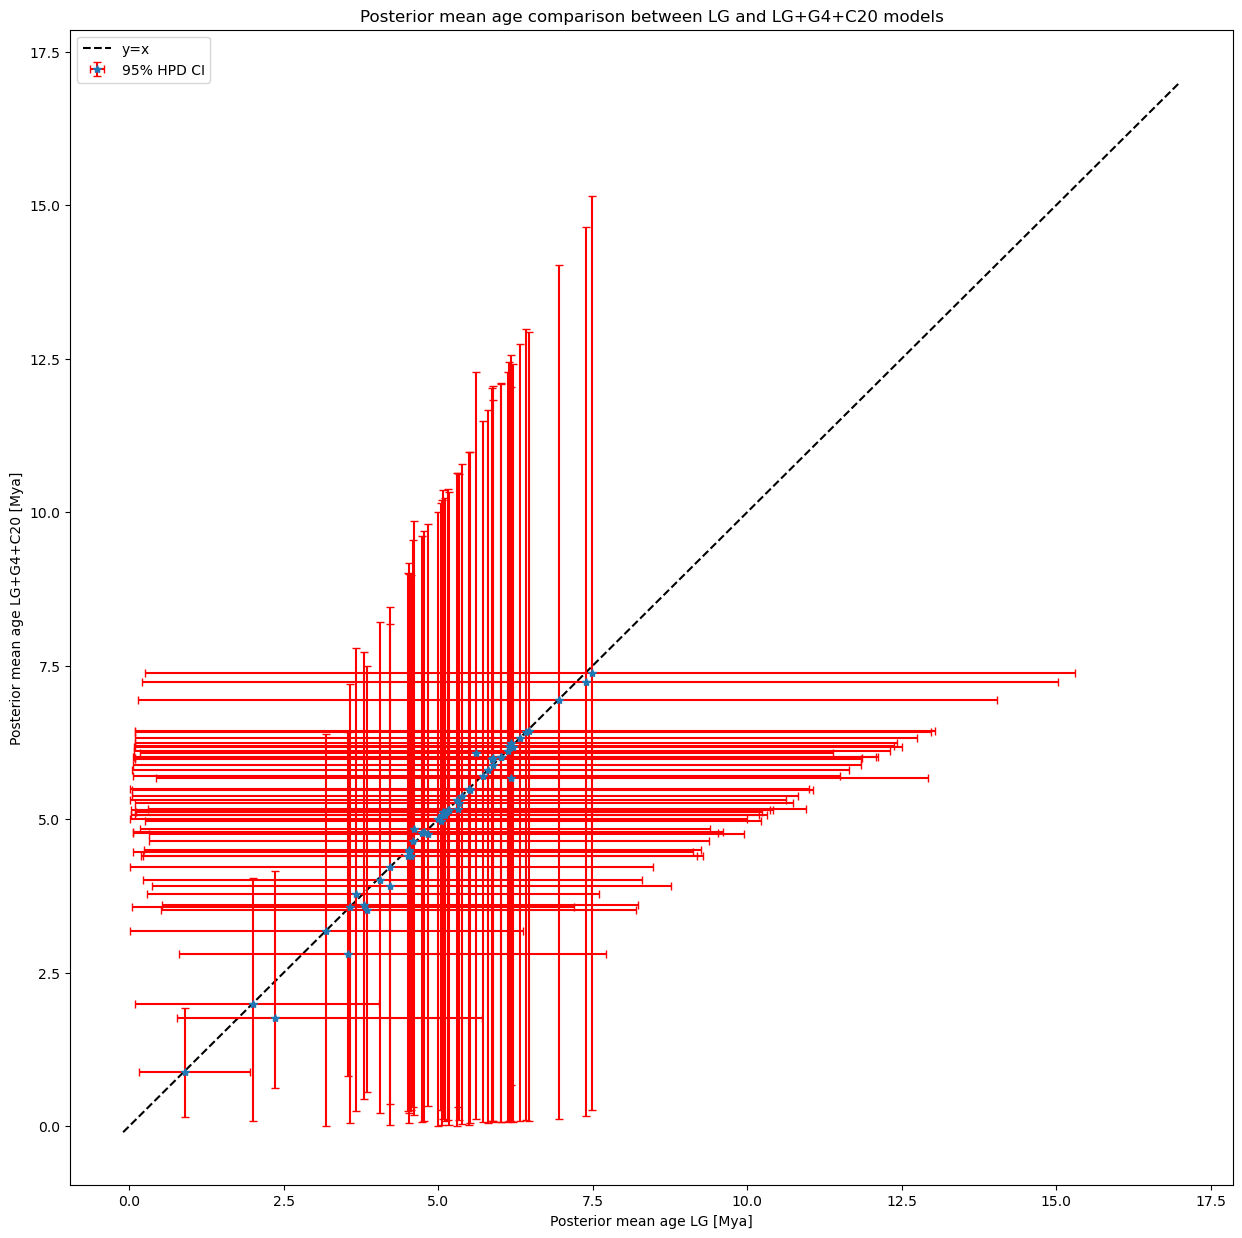

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20.png')

In [24]:
posterior_mean_baseml

[7.4911,
 7.3964,
 6.9498,
 6.4699,
 6.3265,
 6.1441,
 5.8753,
 3.8412,
 5.16,
 4.5272,
 4.2181,
 3.5757,
 3.1836,
 1.9962,
 0.9026,
 4.502,
 6.1696,
 5.6121,
 5.8873,
 5.0402,
 4.59,
 5.0676,
 6.2106,
 6.0191,
 5.8889,
 5.7199,
 5.5053,
 5.3881,
 5.1681,
 4.9932,
 4.7366,
 4.0586,
 3.6735,
 5.1133,
 4.5308,
 6.12,
 2.3637,
 6.0107,
 5.7972,
 5.4903,
 5.3047,
 4.5604,
 4.7632,
 5.3275,
 5.0688,
 4.6125,
 4.2131,
 4.8278,
 6.4171,
 5.3121,
 3.7973,
 3.5464,
 6.1761]

In [25]:
posterior_mean_iqtree

[7.3825,
 7.2299,
 6.944,
 6.4281,
 6.3268,
 6.1826,
 5.972,
 3.5142,
 5.1403,
 4.4669,
 4.217,
 3.5753,
 3.1835,
 1.996,
 0.8876,
 4.4044,
 6.2443,
 6.077,
 5.9866,
 4.9744,
 4.6383,
 5.067,
 6.167,
 6.0135,
 5.8787,
 5.7069,
 5.4678,
 5.3747,
 5.1545,
 4.9939,
 4.7784,
 4.0086,
 3.7814,
 5.0676,
 4.4924,
 6.1055,
 1.7658,
 6.0101,
 5.8051,
 5.4832,
 5.3075,
 4.3966,
 4.7964,
 5.2561,
 5.1123,
 4.8359,
 3.9157,
 4.7606,
 6.4252,
 5.1627,
 3.6071,
 2.8076,
 5.6612]

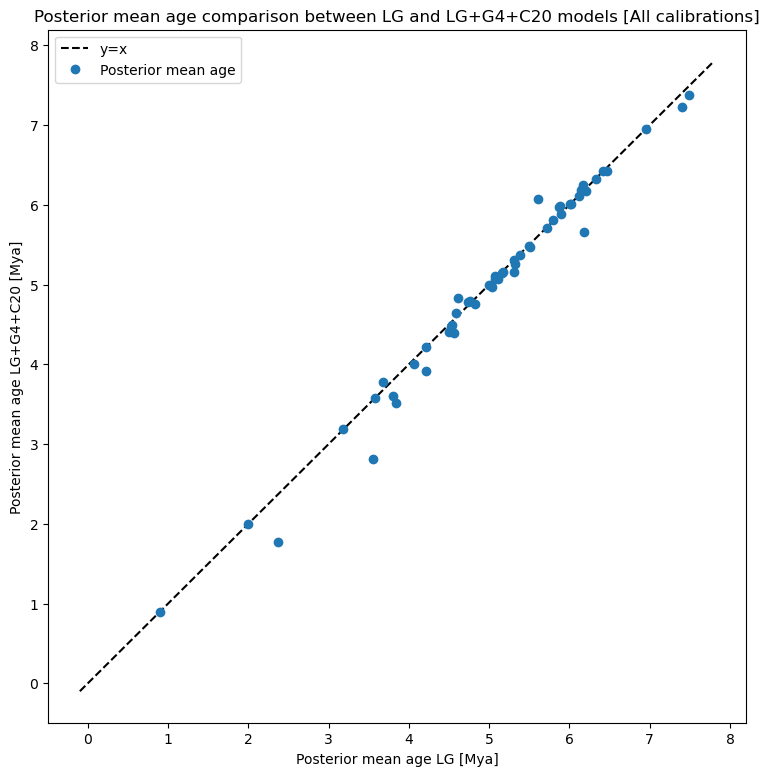

In [26]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,7.8], 
        [-0.1, 7.8], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_scatter.png')